
<span style='color:gray'> Author: Glicerio Vergara.</span>

*https://www.linkedin.com/in/glicerio-vergara*
___
# <span style='color:DarkBlue'> Prediction using Supervised ML.</span>  
___

This is my proposed solution for the first task of the Graduate Rotational Internship Program from The Sparks Foundation (March 2021).

The excersise requieres to predict the percentage of a student based on the no. of study hours. This is a simple linear regression task which involves only 2 variables.

Further instruction information can be found on the following link: *https://drive.google.com/file/d/1cBAUXcE_asXCHNHmZXgVUIZztDi648s1/view?usp=sharing*

### <span style='color:DarkBlue'>  Import the libraries </span>  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### <span style='color:DarkBlue'> Import the data frame </span>

In [2]:
Data_url="http://bit.ly/w-data"
df=pd.read_csv(Data_url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### <span style='color:DarkBlue'> Visualizing the data </span>

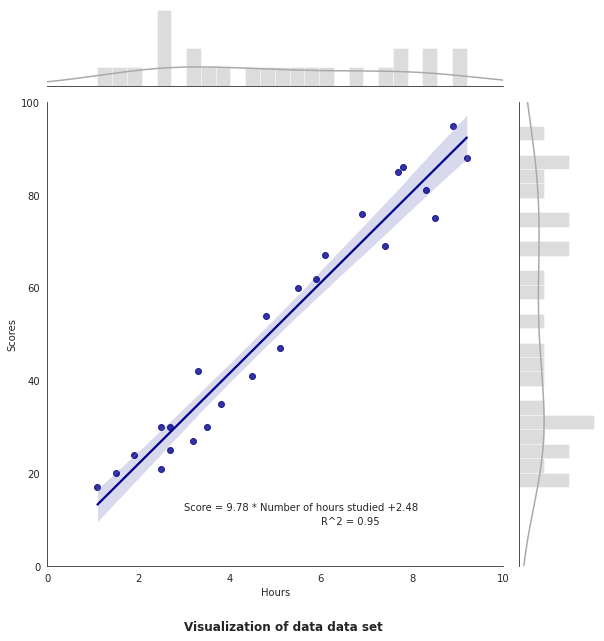

In [4]:
# Assign varibles
x= df['Hours']
y= df['Scores']
# Visualization
sns.set_style('white')
sns.jointplot(x=x, y=y, data=df,kind="reg", xlim=(0, 10), ylim=(0, 100), color="Darkblue",height=8.5,marginal_kws=dict(bins=25,color='darkgrey'))
# Displaying the linear regration equation to the graph
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.text(3,12,"Score = {0:.2f} * Number of hours studied +{1:.2f}".format(slope,intercept))
plt.text(6,9,"R^2 = {0:.2f} ".format(r_value**2))
# Adding the title under the graph
plt.text(3,-14, "Visualization of data data set",fontsize=12,weight="bold")
plt.show()

 ### <span style='color:DarkBlue'> Spliting the data </span>

In [5]:
# Prepering the data to be split
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
# Spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

### <span style='color:DarkBlue'> Visualizing the splited data </span>

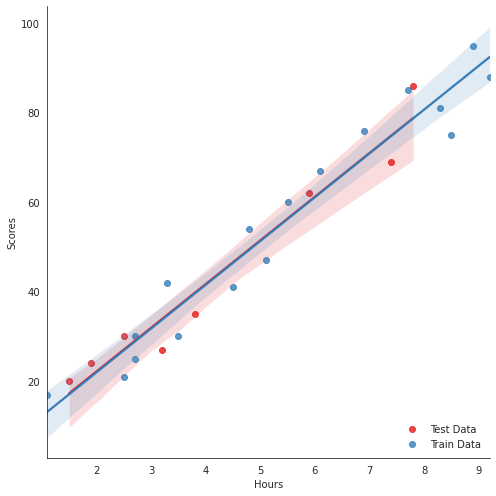

In [6]:
#Rejoining data
X1 = pd.DataFrame(X_train)
Y1 = pd.DataFrame(Y_train)
df1=pd.concat([X1,Y1],axis=1,ignore_index=True)
df1.insert(loc=2,column="Type",value="Train Data")

X2 = pd.DataFrame(X_test)
Y2 = pd.DataFrame(Y_test)
df2=pd.concat([X2,Y2],axis=1,ignore_index=True)
df2.insert(loc=2,column="Type",value="Test Data")

df3=pd.concat([df2,df1],ignore_index=True)
df3.sort_values(by=["Type"])

df3.columns =['Hours','Scores','Type']

#Visualizing rejoined data

sns.lmplot( x="Hours", y="Scores", data=df3, hue='Type', height=7,legend=False, truncate=True,palette="Set1")
plt.legend(loc='lower right',frameon=False)
plt.show()

### <span style='color:DarkBlue'> Result from the train model  </span>

In [7]:
# linear regrassion of the train model
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,Y_train)  
# comparing the model with the test data
Y_pred=lg.predict(X_test)
# creating the data set of the result from the comparison
dfr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
# adding the % error column to the comparison data set
dfr.insert(loc=2,column="% error",value=((dfr['Predicted']-dfr['Actual'])/dfr['Actual']*100))
dfr

,Actual,Predicted,% error
0,20,17.053665,-14.731673
1,27,33.694229,24.793440
2,69,74.806209,8.414795
3,30,26.842232,-10.525893
4,62,60.123359,-3.026841
5,35,39.567369,13.049625
6,24,20.969092,-12.628783
7,86,78.721636,-8.463214


### <span style='color:DarkBlue'> Evaluating the model

In [8]:
# Displaying the parameter to evaluaate the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


### <span style='color:DarkBlue'> Predicting score for students

In [9]:
while True:
    Hours = input("Please enter the studied hours to estimate the score: ")
    try:
        Hours = int(Hours)
        Score=lg.coef_*(Hours)+lg.intercept_
        if Score >100:
             print ("The score of a student that spent ",Hours,"hours studying is predicted to be: 100 ")
        elif Score <0:
            print ("The number of hours need to be positive")
        else:
            print ("The predicted score for a student that studied ",Hours,"hrs will be:", Score)
        break;
    except ValueError:
        try:
            Hours =float(Hours)
            Score=lg.coef_*(Hours)+lg.intercept_
            if Score >100:
                print ("The score of a student that spent ",Hours,"hours studying is predicted to be: 100 ")
            elif Score <0:
                print ("The number of hours need to be positive")
            else:
                print ("The predicted score for a student that studied ",Hours,"hrs will be:", Score)
            break;
        except ValueError:
            print("Invalid input please try again")

Please enter the studied hours to estimate the score: 9.25
The predicted score for a student that studied  9.25 hrs will be: [92.91505723]
